## Pulling in Raw data into Dataframes

In [1]:
# Create import files
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Set the CSV to use as Path Class
closing_prices_path = Path("Closing prices.csv")
ESG_path = Path("barrons_ESG_everyone.csv")
financial_path = Path("FinancialAnalysis_withtickers.csv")
barron_path = Path("barrons_tickers_Morningstars.csv")

In [3]:
# Import CSV into Dataframe

closing_prices = pd.read_csv(closing_prices_path, index_col="Dates", parse_dates=True, infer_datetime_format=True)
ESG_data = pd.read_csv(ESG_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
barron_data= pd.read_csv(barron_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
financial_data = pd.read_csv(financial_path, parse_dates=True, infer_datetime_format=True)
financial_data = financial_data.rename(columns={"Tickers": "Ticker"})
financial_clean = financial_data.set_index('Ticker').dropna()

## Check Dataframes 

In [4]:
# Checking Dataframes

# closing_prices.head()
# ESG_data.head()
# barron_data.head()
# financial_data.head()

## Drop Null Values

In [5]:
# Drop Appropiate columns
# Drop Null Values
closing_fixed = closing_prices.dropna(axis = 'columns')
ESG_fixed = ESG_data.dropna()

# financial_data.isnull().sum()

del financial_clean['Weight (%)']

## Rename Columns

In [6]:
# Rename the columns


closing_fixed.columns = closing_fixed.columns.str.replace(r'us equity', '')

barron_data.columns = ['Name','10 year return', 'Dividend Yield TTM', 'Morningstar Risk', 'Turnover Ratio', 'SEC Dividend Yield', 'Morningstar Rating','Fund Category', 'Standard Deviation 3 year']



In [7]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,SEC Dividend Yield,Morningstar Rating,Fund Category,Standard Deviation 3 year
Ticker,,,,,,,,,
AMFEX,AAMA Equity,NaN,0.87,NaN,20.0,NaN,NaN,Large Blend,NaN
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,2.18,4.0,Large Value,16.13
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.20,3.0,Large Value,19.02
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,NaN,5.0,Large Growth,14.20
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,0.40,4.0,Large Growth,15.04


In [8]:
barron_data = barron_data.dropna(subset=['10 year return'])

In [9]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,SEC Dividend Yield,Morningstar Rating,Fund Category,Standard Deviation 3 year
Ticker,,,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,2.18,4.0,Large Value,16.13
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.20,3.0,Large Value,19.02
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,NaN,5.0,Large Growth,14.20
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,0.40,4.0,Large Growth,15.04
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,NaN,3.0,Large Value,21.02


In [10]:
del barron_data['SEC Dividend Yield']
del barron_data['Standard Deviation 3 year']

In [11]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category
Ticker,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,4.0,Large Value
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.0,Large Value
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,5.0,Large Growth
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,4.0,Large Growth
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,3.0,Large Value


In [12]:
barron_clean = barron_data.drop(['barrons_tickers'])

In [13]:
barron_clean.isnull().sum()

Name                  0
10 year return        0
Dividend Yield TTM    0
Morningstar Risk      0
Turnover Ratio        0
Morningstar Rating    0
Fund Category         0
dtype: int64

## Correctly Formatted Dataframes for Team


In [14]:
ESG_fixed.head()

,Name,E,S,G,Average (Current)
Ticker,,,,,
AUIAX,AB Equity Income A,4.80,11.02,8.35,24.38
FDSAX,AIG Focused Dividend Strategy A,5.59,10.89,7.62,24.10
AKRIX,Akre Focus Instl,2.77,9.97,8.04,20.91
AMAGX,Amana Growth Investor,3.26,9.60,6.95,21.04
BRLVX,American Beacon Bridgeway Lg Cp Val R5,5.68,10.78,8.08,24.53


In [15]:
closing_fixed.head()

,MXXVX,VLCGX,MIGFX,UMLGX,MGK,VIGRX,CSIEX,WLGAX,POGAX,BIAFX,...,SSHFX,HRCVX,FBCVX,NNGRX,TORYX,FDSAX,YAFFX,YACKX,SPX index,GSIN index
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,11.83,10.04,13.43,10.14,41.8700,27.32,30.53,11.40,14.02,7.84,...,28.58,12.06,9.96,17.13,26.76,9.98,16.13,15.22,1115.10,72.81
2010-01-04,12.01,10.22,13.59,10.23,42.4699,27.76,30.97,11.58,14.26,7.93,...,29.10,12.22,10.20,17.45,27.08,10.12,16.33,15.41,1132.98,74.05
2010-01-05,12.07,10.24,13.57,10.27,42.5700,27.84,31.09,11.61,14.30,7.97,...,29.20,12.23,10.29,17.52,27.07,10.14,16.33,15.41,1136.52,74.24
2010-01-06,12.04,10.25,13.55,10.28,42.5200,27.84,31.12,11.58,14.31,7.98,...,29.32,12.27,10.33,17.58,27.11,10.13,16.31,15.40,1137.14,74.19
2010-01-07,12.10,10.23,13.57,10.28,42.5800,27.89,31.18,11.62,14.38,8.02,...,29.50,12.30,10.43,17.68,27.30,10.15,16.32,15.42,1141.70,74.08


In [16]:
barron_clean.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category
Ticker,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,4.0,Large Value
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.0,Large Value
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,5.0,Large Growth
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,4.0,Large Growth
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,3.0,Large Value


In [17]:
financial_clean.head()

,Name,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,
AMFEX,AAMA Equity,16.21,2.81,9.91,28.25,9.79,0.87,"114,361.73"
AUIAX,AB Equity Income A,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"
AKRIX,Akre Focus Instl,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"
AMAGX,Amana Growth Investo,23.53,7.27,14.04,40.37,10.65,0.37,"83,714.94"


## Concat ESG and Financial Metrics and Barron

In [18]:
esg_fm_barron = pd.concat([barron_clean.drop(columns = "10 year return", inplace = False),ESG_fixed.drop(columns = 'Name',inplace = False), financial_clean.drop(columns = 'Name',inplace = False)], axis = 'columns', join = 'inner')
esg_fm_barron_df = esg_fm_barron.drop(['CMLIX', 'JNGIX', 'SPY'])

## Performance anaylsis

In [19]:
esg_fm_barron_df.head()

,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Average (Current),P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,
AUIAX,AB Equity Income A,2.91,Below Average,43.0,4.0,Large Value,4.80,11.02,8.35,24.38,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend Strategy A,3.95,Average,37.0,3.0,Large Value,5.59,10.89,7.62,24.10,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"
AKRIX,Akre Focus Instl,0.00,Low,3.0,5.0,Large Growth,2.77,9.97,8.04,20.91,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"
AMAGX,Amana Growth Investor,0.37,Low,0.0,4.0,Large Growth,3.26,9.60,6.95,21.04,23.53,7.27,14.04,40.37,10.65,0.37,"83,714.94"
BRLVX,American Beacon Bridgeway Lg Cp Val R5,2.47,Above Average,44.0,3.0,Large Value,5.68,10.78,8.08,24.53,12.79,1.86,5.64,16.84,8.09,2.47,"36,213.84"


In [20]:
closing_fixed.iloc[-1]

 MXXVX          32.04
 VLCGX          18.87
 MIGFX          32.95
 UMLGX          13.00
 MGK           145.66
               ...   
 FDSAX          17.36
 YAFFX          18.25
 YACKX          20.48
SPX index     3230.78
GSIN index     144.01
Name: 2020-01-01 00:00:00, Length: 133, dtype: float64

**Calculating Total Returns**

In [21]:
closing_fixed_total_returns = (closing_fixed.iloc[-1] / closing_fixed.iloc[0]) - 1
closing_fixed_total_returns.sort_values(ascending=False).head(10)

 AKRIX     3.480354
 EGFIX     2.836653
 PWB       2.572099
 MGK       2.478863
 VIGRX     2.435944
 PKW       2.332915
 VFTNX     2.288288
 SPHQ      2.259358
 BIAFX     2.177296
 VHIAX     2.027778
dtype: float64

**Calculating Annualized Returns**

In [22]:
closing_fixed_annualized_returns = ((1+closing_fixed_total_returns)**(1/10))-1
closing_fixed_annualized_returns.sort_values(ascending=False).head(20)

 AKRIX       0.161800
 EGFIX       0.143919
 PWB         0.135775
 MGK         0.132775
 VIGRX       0.131370
 PKW         0.127931
 VFTNX       0.126411
 SPHQ        0.125416
 BIAFX       0.122550
 VHIAX       0.117152
 FTCS        0.113928
 MEGBX       0.113537
SPX index    0.112242
 GTLLX       0.111903
 AFDAX       0.111357
 JPGSX       0.109881
 DSI         0.108951
 POGAX       0.107923
 GCEQX       0.107792
 SUSA        0.105853
dtype: float64

In [23]:
type(closing_fixed_annualized_returns)

pandas.core.series.Series

**Converting Series to DataFrame**

In [24]:
results = pd.DataFrame( data = closing_fixed_annualized_returns)
results.to_csv('portfolio.csv')
returns_path = Path("portfolio.csv")
returns_df = pd.read_csv(returns_path, parse_dates=True, infer_datetime_format=True)
returns_data = returns_df.rename(columns={"Unnamed: 0": "Ticker", "0": "Returns"})
returns_data['Ticker'] = returns_data['Ticker'].str.strip()

In [25]:
returns_data_1 = returns_data.set_index('Ticker').dropna()
final_returns = returns_data_1.drop(['SPX index', 'GSIN index', 'CSLBX', 'MASPX', 'TWGTX'])

In [26]:
combined = pd.concat([final_returns, esg_fm_barron_df], axis = 'columns', join = 'inner')
##combined.head()
combined

,Returns,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Average (Current),P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,,
MXXVX,0.104767,Matthew 25,0.49,High,10.99,2.0,Large Blend,2.01,10.75,8.59,23.61,29.34,5.34,8.95,24.42,15.53,0.45,"103,443.62"
VLCGX,0.065133,VALIC Company I Large Capital Growth,0.76,Below Average,26.00,3.0,Large Growth,3.37,10.88,7.98,22.23,21.55,4.24,11.26,32.78,10.99,0.76,"110,789.24"
MIGFX,0.093901,MFS Massachusetts Inv Gr Stk A,0.27,Below Average,23.00,3.0,Large Growth,3.46,10.85,7.99,22.30,26.09,3.82,11.65,29.66,13.72,0.00,"139,853.75"
UMLGX,0.025157,Columbia Select Large Cap Growth Inst,0.00,High,27.00,3.0,Large Growth,2.06,11.32,7.65,22.01,15.02,2.18,9.51,24.97,10.45,1.09,"109,524.92"
MGK,0.132775,Vanguard Mega Cap Growth ETF,1.00,Average,14.00,4.0,Large Growth,2.71,11.41,8.23,22.58,23.60,4.71,12.33,33.24,12.75,1.00,"220,639.69"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NNGRX,0.033519,Nuveen Large-Cap Value I,1.92,High,145.00,2.0,Large Value,4.08,11.02,8.15,23.47,10.43,1.34,9.12,27.22,10.71,1.12,"42,661.46"
TORYX,0.065988,Torray,3.32,Below Average,11.05,2.0,Large Value,4.57,10.93,9.24,24.75,11.20,1.28,5.20,17.77,8.45,3.32,"82,478.61"
FDSAX,0.056920,AIG Focused Dividend Strategy A,3.95,Average,37.00,3.0,Large Value,5.59,10.89,7.62,24.10,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"


## ESG Comparisons

In [36]:
ESG = combined[['E','S','G','Average (Current)']].copy()

ESG


,E,S,G,Average (Current)
Ticker,,,,
MXXVX,2.01,10.75,8.59,23.61
VLCGX,3.37,10.88,7.98,22.23
MIGFX,3.46,10.85,7.99,22.30
UMLGX,2.06,11.32,7.65,22.01
MGK,2.71,11.41,8.23,22.58
...,...,...,...,...
NNGRX,4.08,11.02,8.15,23.47
TORYX,4.57,10.93,9.24,24.75
FDSAX,5.59,10.89,7.62,24.10


In [28]:
#Grab the 'Returns' and 'Name' columns
top_funds = combined.loc[:, ['Returns', 'Name']]

#Set the 'Name' as the index
#top_funds.set_index(top_funds['Name'], inplace=True)

#Drop the extra 'Names' columns
top_funds.drop(columns=['Name'], inplace=True)

# Filter down to 20 highest performing funds
top_funds_perf = top_funds.nlargest(20, 'Returns')

# Display the 20 highest performing funds
top_funds_perf

,Returns
Ticker,
AKRIX,0.161800
EGFIX,0.143919
PWB,0.135775
MGK,0.132775
VIGRX,0.131370
PKW,0.127931
VFTNX,0.126411
SPHQ,0.125416
BIAFX,0.122550


In [29]:
ESG_Top20 = ESG.join(top_funds_perf, how='inner')
ESG_Refined = ESG_Top20.sort_values(by='Returns', ascending=False)
ESG_Refined

,E,S,G,Average (Current),Returns
Ticker,,,,,
AKRIX,2.77,9.97,8.04,20.91,0.161800
EGFIX,2.71,10.16,7.92,20.80,0.143919
PWB,3.30,10.72,7.71,21.74,0.135775
MGK,2.71,11.41,8.23,22.58,0.132775
VIGRX,3.01,11.36,8.11,22.76,0.131370
PKW,2.98,11.44,8.55,23.93,0.127931
VFTNX,3.02,11.29,8.19,22.51,0.126411
SPHQ,3.83,11.28,8.42,23.54,0.125416
BIAFX,2.94,10.44,8.23,22.25,0.122550


In [30]:
## Lower scores mean less risk
labels = 'E','S','G'
sizes = [ESG_Refined['E'].mean(), ESG_Refined['S'].mean(), ESG_Refined['G'].mean()]
explode = (0.12, 0, 0)
ESG_Refined.mean()

E                     3.049500
S                    10.827500
G                     7.924000
Average (Current)    22.083500
Returns               0.121088
dtype: float64

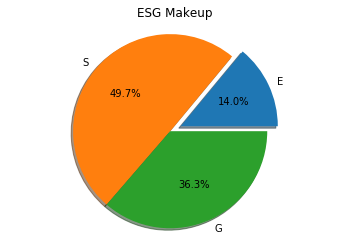

In [54]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
ax1.set_title('ESG Makeup')
plt.show()

In [32]:
## Shows that companies are most proficient in the E category, Environmental

Text(0.5, 0, 'MorningStar Rating')

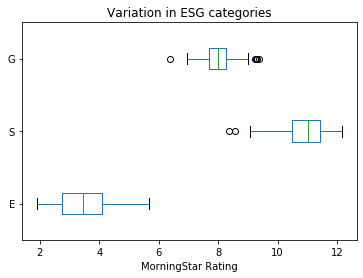

In [56]:
SDplot = combined[['E','S','G']].copy()
SDplot
Bx = SDplot.plot.box(vert=False, title = 'Variation in ESG categories')
Bx.set_xlabel('MorningStar Rating')
